In [1]:
# Import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes 
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
# Import the requests library.
import requests

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yarada
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | lavrentiya
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | aden
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | chapleau
Processing Record 16 of Set 1 | trincomalee
Processing Record 17 of Set 1 | drayton valley
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of S

Processing Record 42 of Set 4 | saluzzo
Processing Record 43 of Set 4 | vilyuysk
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | port-gentil
Processing Record 48 of Set 4 | dalnegorsk
Processing Record 49 of Set 4 | niamey
Processing Record 50 of Set 4 | black river
Processing Record 1 of Set 5 | rongcheng
Processing Record 2 of Set 5 | meyungs
City not found. Skipping...
Processing Record 3 of Set 5 | xianyang
Processing Record 4 of Set 5 | mar del plata
Processing Record 5 of Set 5 | raudeberg
Processing Record 6 of Set 5 | aflu
City not found. Skipping...
Processing Record 7 of Set 5 | kuah
Processing Record 8 of Set 5 | zharkovskiy
Processing Record 9 of Set 5 | poum
Processing Record 10 of Set 5 | goderich
Processing Record 11 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 12 of Set 5 | dikson
Processing Re

Processing Record 29 of Set 8 | tongliao
Processing Record 30 of Set 8 | turukhansk
Processing Record 31 of Set 8 | babaeski
Processing Record 32 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 33 of Set 8 | marzuq
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | lakes entrance
Processing Record 36 of Set 8 | bayan
Processing Record 37 of Set 8 | samusu
City not found. Skipping...
Processing Record 38 of Set 8 | karaul
City not found. Skipping...
Processing Record 39 of Set 8 | ayr
Processing Record 40 of Set 8 | homer
Processing Record 41 of Set 8 | uyar
Processing Record 42 of Set 8 | dubti
Processing Record 43 of Set 8 | wattegama
Processing Record 44 of Set 8 | lahaina
Processing Record 45 of Set 8 | pemangkat
Processing Record 46 of Set 8 | lukovetskiy
Processing Record 47 of Set 8 | baley
Processing Record 48 of Set 8 | chokurdakh
Processing Record 49 of Set 8 | phaltan
Processing Record 50 of Set 8 | isangel
Processing Record 1 of Set 9 

City not found. Skipping...
Processing Record 21 of Set 12 | kibara
Processing Record 22 of Set 12 | itarema
Processing Record 23 of Set 12 | tabou
Processing Record 24 of Set 12 | banda aceh
Processing Record 25 of Set 12 | yurino
Processing Record 26 of Set 12 | caravelas
Processing Record 27 of Set 12 | port blair
Processing Record 28 of Set 12 | brezovo
Processing Record 29 of Set 12 | rovaniemi
Processing Record 30 of Set 12 | muros
Processing Record 31 of Set 12 | darapidap
Processing Record 32 of Set 12 | santa vitoria do palmar
Processing Record 33 of Set 12 | ordzhonikidze
Processing Record 34 of Set 12 | hirara
Processing Record 35 of Set 12 | togur
Processing Record 36 of Set 12 | tura
Processing Record 37 of Set 12 | sanchor
Processing Record 38 of Set 12 | soure
Processing Record 39 of Set 12 | aykhal
Processing Record 40 of Set 12 | bryan
Processing Record 41 of Set 12 | port lincoln
Processing Record 42 of Set 12 | santa isabel do rio negro
Processing Record 43 of Set 12

In [11]:
len(city_data)

583

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yarada,17.65,83.27,84.20,89,40,2.24,IN,2020-08-30 02:26:49
1,Bluff,-46.60,168.33,54.03,74,67,29.46,NZ,2020-08-30 02:26:49
2,Longyearbyen,78.22,15.64,41.00,89,40,21.92,SJ,2020-08-30 02:26:49
3,Barrow,71.29,-156.79,37.40,74,90,17.22,US,2020-08-30 02:21:51
4,Lavrentiya,65.58,-171.00,50.74,65,0,10.76,RU,2020-08-30 02:26:50
5,Cape Town,-33.93,18.42,39.20,93,75,2.24,ZA,2020-08-30 02:24:44
6,Ushuaia,-54.80,-68.30,32.00,93,90,20.80,AR,2020-08-30 02:26:50
7,East London,-33.02,27.91,52.05,61,42,18.97,ZA,2020-08-30 02:26:50
8,Bengkulu,-3.80,102.27,83.79,64,67,4.34,ID,2020-08-30 02:22:49
9,Busselton,-33.65,115.33,55.99,69,51,5.99,AU,2020-08-30 02:26:50


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yarada,IN,2020-08-30 02:26:49,17.65,83.27,84.20,89,40,2.24
1,Bluff,NZ,2020-08-30 02:26:49,-46.60,168.33,54.03,74,67,29.46
2,Longyearbyen,SJ,2020-08-30 02:26:49,78.22,15.64,41.00,89,40,21.92
3,Barrow,US,2020-08-30 02:21:51,71.29,-156.79,37.40,74,90,17.22
4,Lavrentiya,RU,2020-08-30 02:26:50,65.58,-171.00,50.74,65,0,10.76
5,Cape Town,ZA,2020-08-30 02:24:44,-33.93,18.42,39.20,93,75,2.24
6,Ushuaia,AR,2020-08-30 02:26:50,-54.80,-68.30,32.00,93,90,20.80
7,East London,ZA,2020-08-30 02:26:50,-33.02,27.91,52.05,61,42,18.97
8,Bengkulu,ID,2020-08-30 02:22:49,-3.80,102.27,83.79,64,67,4.34
9,Busselton,AU,2020-08-30 02:26:50,-33.65,115.33,55.99,69,51,5.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
import time
# Get today's date in seconds.
today = time.time()
today

1598755238.929909

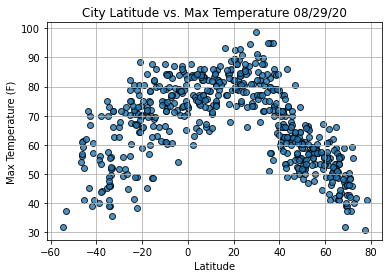

In [17]:
# Build the scatter plot for latitude vs. max temperature 
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure 
plt.savefig("weather_data/Fig1.png")

# Show plot 
plt.show()

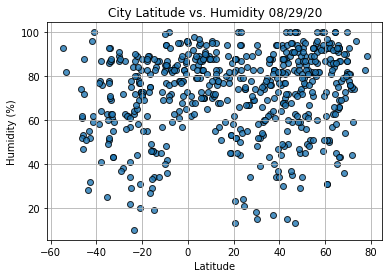

In [18]:
# Build the scatter plots for latitude vs. humidity 
plt.scatter(lats, 
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other grapgh properties 
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Show the plot 
plt.show()

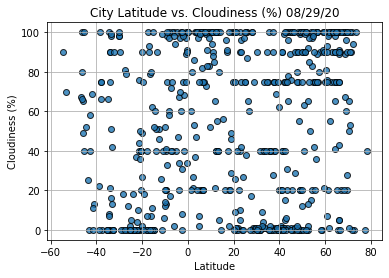

In [19]:
# Build the scatter plots for latitude vs. cloudiness 
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot 
plt.show()

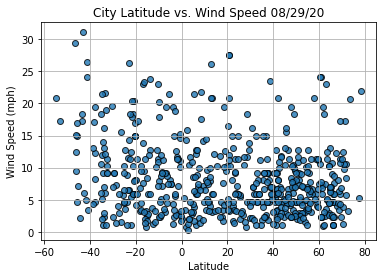

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                  Trincomalee
Country                        LK
Date          2020-08-30 02:26:51
Lat                          8.57
Lng                         81.23
Max Temp                    82.11
Humidity                       73
Cloudiness                    100
Wind Speed                  17.52
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
578     True
579     True
580    False
581     True
582    False
Name: Lat, Length: 583, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yarada,IN,2020-08-30 02:26:49,17.65,83.27,84.20,89,40,2.24
2,Longyearbyen,SJ,2020-08-30 02:26:49,78.22,15.64,41.00,89,40,21.92
3,Barrow,US,2020-08-30 02:21:51,71.29,-156.79,37.40,74,90,17.22
4,Lavrentiya,RU,2020-08-30 02:26:50,65.58,-171.00,50.74,65,0,10.76
10,Aden,YE,2020-08-30 02:26:50,12.78,45.04,85.77,76,55,26.11
...,...,...,...,...,...,...,...,...,...
576,Chervonohryhorivka,UA,2020-08-30 02:28:23,47.62,34.54,62.01,62,2,2.24
577,Bonthe,SL,2020-08-30 02:28:23,7.53,-12.51,75.33,90,100,9.93
578,Gusau,NG,2020-08-30 02:28:23,12.16,6.66,73.18,88,100,3.27
579,Atbasar,KZ,2020-08-30 02:28:23,51.80,68.33,65.91,56,0,5.44


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                       for Maximum Temperature', 'Max Temp',(10,40)) 

SyntaxError: EOL while scanning string literal (<ipython-input-26-0b9afdd237a1>, line 6)

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))


SyntaxError: EOL while scanning string literal (<ipython-input-27-8677a9d312d4>, line 6)

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

SyntaxError: EOL while scanning string literal (<ipython-input-28-1d3c2bd0b2d6>, line 6)

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-29-9c3e8b244753>, line 6)

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-30-3dc99b339452>, line 6)

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-31-7024af74f12d>, line 6)

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-32-8c4f0e57bb27>, line 6)